## Load up data

In [1]:
# Remember to stack
# Check the shape of inputs, labels

import numpy as np
import matplotlib.pyplot as plt
import csv
from mpl_toolkits.mplot3d import Axes3D

In [2]:
x1 = np.genfromtxt('x1.csv', delimiter=',')[1:,:]
x2 = np.genfromtxt('x2.csv', delimiter=',')[1:,:]
inputs = np.concatenate((x1,x2),axis=0)
intercept_wt = np.ones((inputs.shape[0],1))
inputs_fin = np.concatenate((intercept_wt, inputs), axis = 1)
labels = np.genfromtxt('labels.csv', delimiter=',')[1:]
print(labels.shape, inputs_fin.shape)

(10000,) (10000, 3)


<Figure size 432x288 with 0 Axes>

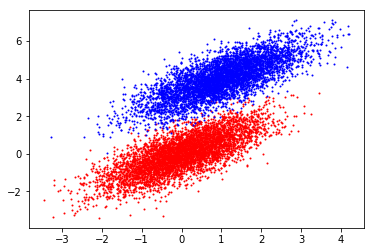

<Figure size 432x288 with 0 Axes>

In [3]:
## Visualize the data
plt.plot(x1[:,0], x1[:,1], 'ro', markersize=1)
plt.plot( x2[:,0], x2[:,1], 'bo', markersize=1)
plt.figure(2)

In [4]:
# Assign different classes with different colors
# HINT: plt.plot might be slow for plotting- there are faster ways

## Log likelihood calculation

Write down the sigmoid and log-likelihood equations for logistic regression (use LaTeX to write equations)

\begin{align}
h_{\theta}(x) & = 1/(1+ e^{-\theta^{T}x}) \\
l_{(\theta)} = log( L_{(\theta)} )&=\sum_{i=1}^m  \lbrack y^{(i)} log (h_{\theta} (x^{(i)})) + (1-y^{(i)}) log( 1 - h_{\theta} (x^{(i)} ) ) \rbrack \\
\
\end{align}

Fill in the sigmoid and log-likelihood functions:

In [5]:
# Takes in value(s) and returns it's sigmoid value
def sigmoid(input_value): 
    return np.divide(1 , ( 1 + np.exp(-input_value) ))

In [6]:
# Takes in arguments and returns log-likelihood
def log_likelihood(inputs_fin, labels, weights): 
    l=0
    for i in range(inputs_fin.shape[0]):
        l=l + labels[i] * log( sigmoid(weights @ inputs_fin[i,:])) + (1-labels[i])*log(1 - sigmoid(weights @ inputs_fin[i,:]) )
    return 

## Logistic Regression

Write down the gradient of the log-likelihood with respect to the weights (using LateX and then fill in the function)


\begin{equation}
\frac{\partial l_{(\theta)} }{\partial \theta_{j} } = \sum_{i=1}^m \lbrack y^{(i)} - 1/(1+ e^{-\theta^{T}x^{(i)}}) \rbrack x_j^{(i)}
\end{equation}


In [7]:
def logistic_regression(inputs_fin, labels, num_steps, learning_rate):
    # inputs: N * 2 dimensional array
    # labels: N dimensional array
    # num_steps: Number of steps of gradient descent
    # learning_rate: associated with gradient descent
    weights = np.array([[1, 1, 1]]); #grad=np.zeros((1,2))
    
    for iter in range(num_steps):
         
        grad = ( labels - sigmoid(weights@ inputs_fin.T) )@ inputs_fin
        weights = weights + learning_rate*grad
    
    return weights

In [8]:
## Weight calculation and Accuracy
#Calculate the weights for the parameters: num_steps = 50000, learning_rate = 5e-5, and print the weights
    

In [9]:
weights = logistic_regression(inputs_fin, labels, 50000, 5e-5)
print(weights)

[[-13.58676164  -4.88091373   7.99804621]]


In [14]:
## Visualizing mispredictions with your Model
def predict_fn(X, weights):
    return sigmoid(weights@ inputs_fin.T)

Y_predict = predict_fn(inputs_fin, weights)
Y_predict[np.where(Y_predict > 0.5)] = 1
Y_predict[np.where(Y_predict < 0.5)] = 0

Accuracy from self-defined function is 0.99480 


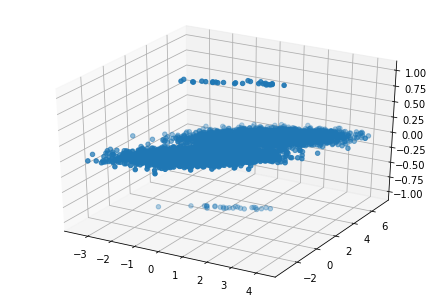

In [15]:
# Plot the inputs and differentiate the mispredicted points by plotting them with different color. 
# print accuracy
# print accuracy
count = 0
for i in range(Y_predict.shape[1]):
    count += int(Y_predict[0,i] == labels[i])
print("Accuracy from self-defined function is %0.5f " %(float(count) / Y_predict.shape[1]))

# plot prediction
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(inputs_fin[:, 1], inputs_fin[:, 2], Y_predict - labels)
plt.show()

The mis-classified points are clearly visible in the above plot.

## Comparision with sklearn and Accuracy

In [12]:
# Write your code here
from sklearn.linear_model import LogisticRegression

# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()

logisticRegr.fit(inputs_fin, labels)

C:\Users\rosha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [13]:
# Calculate the accuracy of the labels obtained from sklearn
# Compare the two sets of accuracies
count_1 = 0
for i in range(len(labels)):
    count_1 += int( int(logisticRegr.predict(inputs_fin[i,:].reshape(1,-1))) == labels[i])
print("Accuracy from sklearn is %0.5f " %(float(count_1) / len(labels)))

Accuracy from sklearn is 0.99500 
